# KMeans Example with Iris Dataset (Unsupervised Learning)

## Import Libraries

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

### Set Random Seed

In [2]:
rng = np.random.RandomState(42)

## Data Loading

In [3]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris['data'], columns=iris["feature_names"])

## Inspect Data structure

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### make Target Dataframe

In [6]:
iris_targets = pd.DataFrame(iris["target"], columns=["target"])

### Add Categorical label for target (since it is a categorical)

In [7]:
iris_targets["species"] = iris_targets["target"].apply(lambda x : iris["target_names"][x])

In [8]:
iris_targets.value_counts()

target  species   
0       setosa        50
1       versicolor    50
2       virginica     50
Name: count, dtype: int64

In [9]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_targets

,target,species
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [12]:
pd.concat([iris_df,iris_targets], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## EDA Exploratory Data Analysis

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

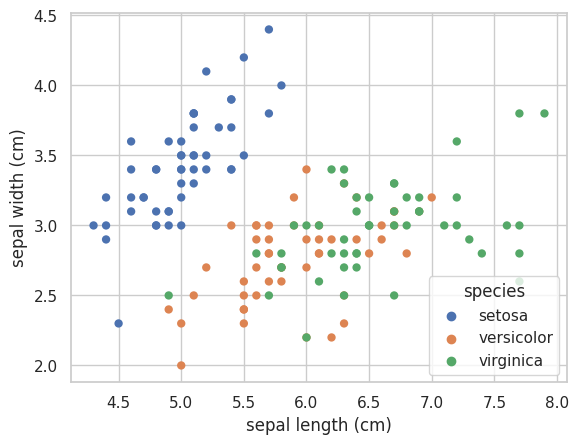

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")



sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)",
                hue="species",
                sizes=(1, 8), linewidth=0,
                data=pd.concat([iris_df,iris_targets], axis= 1))


<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

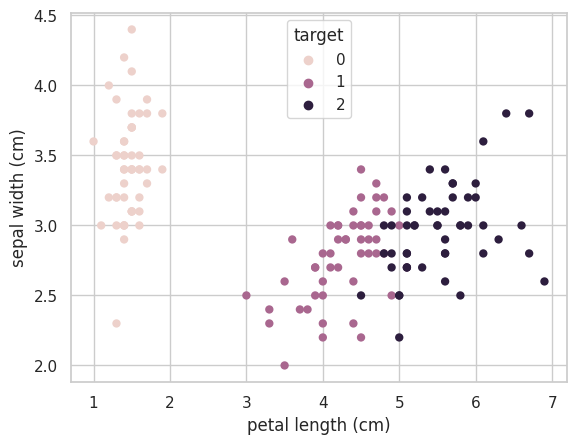

In [14]:
sns.scatterplot(x="petal length (cm)", y="sepal width (cm)",
                hue="target",
                sizes=(1, 8), linewidth=0,
                data=pd.concat([iris_df,iris_targets], axis= 1))

Great but what if I don't have the targets!!

<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

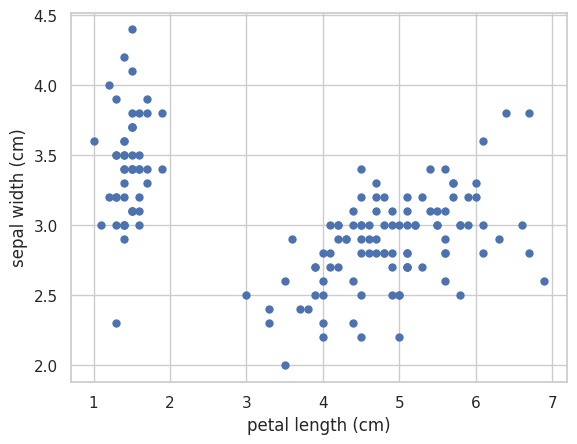

In [15]:
sns.scatterplot(x="petal length (cm)", y="sepal width (cm)",
#                 hue="species",
                sizes=(1, 8), linewidth=0,
                data=pd.concat([iris_df], axis= 1))

**This might seem all quite complicated but we did Machine Learning in four lines of python**
1. Import the model from sklearn
2. Initialise and set Hyper-parameters
3. Train or 'Fit' the model to our data
4. Use it to make predictions!!

```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init='auto', random_state=rng)
model = model.fit(iris_df)
predictions["cluster"] = model.predict(iris_df)

```

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=3, n_init='auto', random_state=rng)

In [18]:
model = model.fit(iris_df)

In [19]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
predictions = iris_df.copy()
predictions["cluster"] = model.predict(iris_df)
predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

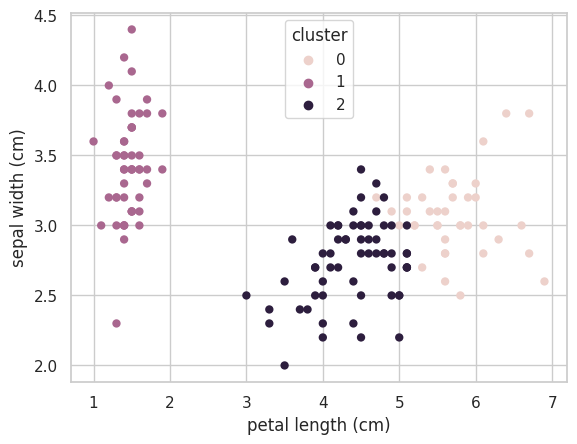

In [21]:
sns.scatterplot(x="petal length (cm)", y="sepal width (cm)",
                hue="cluster",
                sizes=(1, 8), linewidth=0,
                data=predictions)

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris_df,random_state=rng, test_size=0.2)

In [23]:
model = KMeans(3, n_init="auto", random_state=rng)

In [24]:
model = model.fit(train)

In [25]:
train.count()

sepal length (cm)    120
sepal width (cm)     120
petal length (cm)    120
petal width (cm)     120
dtype: int64

In [26]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
78,6.0,2.9,4.5,1.5
106,4.9,2.5,4.5,1.7
128,6.4,2.8,5.6,2.1
55,5.7,2.8,4.5,1.3
94,5.6,2.7,4.2,1.3
29,4.7,3.2,1.6,0.2
147,6.5,3.0,5.2,2.0
51,6.4,3.2,4.5,1.5
98,5.1,2.5,3.0,1.1
141,6.9,3.1,5.1,2.3


In [27]:
model.predict(test)

array([2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 2, 0, 0], dtype=int32)

In [28]:
model.predict(test)

array([2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 2, 0, 0], dtype=int32)

In [29]:
iris_targets.loc[16]

target          0
species    setosa
Name: 16, dtype: object

In [30]:
predictions_test = test.copy()

predictions_test["predict"] = model.predict(test)
predictions_test['predict'] = predictions_test['predict'].apply(
    lambda x: 0 if x == 1 else ( 1 if x == 0 else x ) ) 
predictions_test["target"] = predictions_test.index.map(iris_targets['target'])
predictions_test["species"] = predictions_test.index.map(iris_targets['species'])



In [31]:
predictions_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict,target,species
78,6.0,2.9,4.5,1.5,2,1,versicolor
106,4.9,2.5,4.5,1.7,2,2,virginica
128,6.4,2.8,5.6,2.1,1,2,virginica
55,5.7,2.8,4.5,1.3,2,1,versicolor
94,5.6,2.7,4.2,1.3,2,1,versicolor
29,4.7,3.2,1.6,0.2,0,0,setosa
147,6.5,3.0,5.2,2.0,1,2,virginica
51,6.4,3.2,4.5,1.5,2,1,versicolor
98,5.1,2.5,3.0,1.1,2,1,versicolor
141,6.9,3.1,5.1,2.3,1,2,virginica


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
predictions_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict,target,species
78,6.0,2.9,4.5,1.5,2,1,versicolor
106,4.9,2.5,4.5,1.7,2,2,virginica
128,6.4,2.8,5.6,2.1,1,2,virginica
55,5.7,2.8,4.5,1.3,2,1,versicolor
94,5.6,2.7,4.2,1.3,2,1,versicolor
29,4.7,3.2,1.6,0.2,0,0,setosa
147,6.5,3.0,5.2,2.0,1,2,virginica
51,6.4,3.2,4.5,1.5,2,1,versicolor
98,5.1,2.5,3.0,1.1,2,1,versicolor
141,6.9,3.1,5.1,2.3,1,2,virginica


In [34]:
accuracy_score(predictions_test['target'], predictions_test['predict'])

0.4666666666666667

In [35]:
setosa = predictions_test[predictions_test['species'] == 'setosa']
accuracy_score(setosa['target'], setosa['predict'])

1.0

In [36]:
versicolor = predictions_test[predictions_test['species'] == 'versicolor']
# Accuracy test
accuracy_score(versicolor['target'], versicolor['predict'])

0.0

In [37]:
virginica = predictions_test[predictions_test['species'] == 'virginica']
accuracy_score(virginica['target'], virginica['predict'])

0.4

We will load the data from the SKLean Toy Datasets

How do we get this into a data frame? Lets look at the keys in the 'bunch' (its just a dictionary really)

Okay, let's use those keys to make us a dataframe for the **Target Attributes**:

What feature names are there?

These will be our column names for the **Data Attributes**

Now we can make a Data Frame for our Data Attributes: (This will contain all our *Independent Variables*)

Lets look at what we got: